## Carta plastica
***Plasticidad***

La plasticidad es un comportamiento mecánico característico de ciertos materiales anelásticos consistente en la aparición de deformarse permanente e irreversiblemente cuando se encuentra sometido a tensiones por encima de su rango elástico, es decir, por encima de su límite elástico.

En los metales, la plasticidad se explica en términos de desplazamientos irreversibles de dislocaciones.

<img style="float: best; margin: 0px 0px 15px 15px;" src="img.png" width="400px" height="125px" />

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Clasificador limos-arcillas

La característica física más significativa de las arcillas es la plasticidad, que es la capacidad de deformarse sin
agrietarse ante un esfuerzo mecánico conservando la deformación al retirarse la carga (No se produce rebote
elástico). 

In [3]:
data_file = 'CartaPlastica.csv'
data = pd.read_csv(data_file, header=None)

X = data.iloc[:,0:2].values
Y = data.iloc[:,2].values

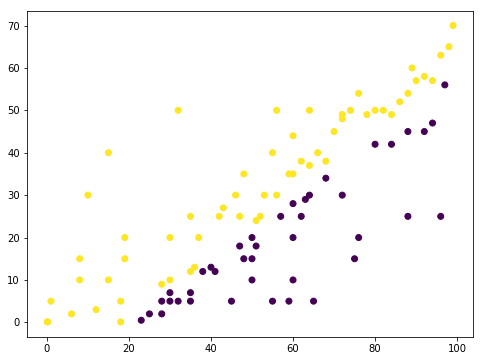

In [4]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [5]:
def fun_log(z):
    return 1/(1+np.exp(-z))

def reg_log(B,Xa):
    return fun_log(Xa.dot(B))

In [6]:
import pyomo_utilities

In [7]:
B = pyomo_utilities.logreg_clas(X, Y)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.12449908256530762
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


/Users/eremarin45/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


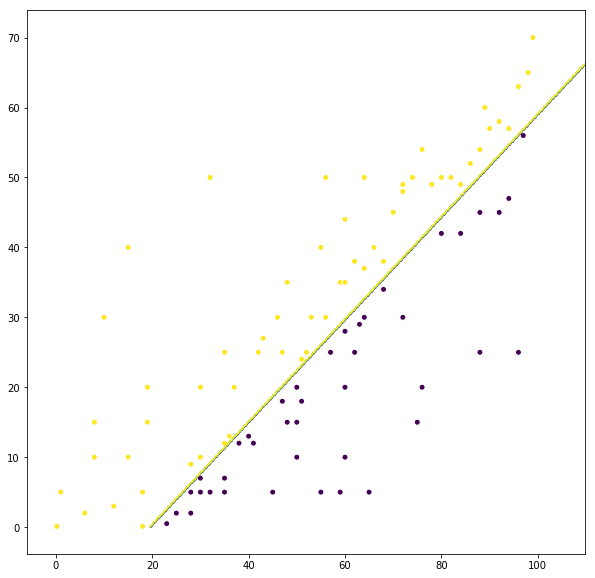

In [8]:
x = np.arange(0, 110, 0.2)
y = np.arange(0, 70, 0.2)
Xm, Ym = np.meshgrid(x, y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n,1))
Ymr = np.reshape(Ym,(m*n,1))

Xa = np.append(np.ones((len(Ymr),1)), Xmr, axis=1)
Xa = np.append(Xa,Ymr,axis=1)

Yg = reg_log(B,Xa)
Z = np.reshape(Yg, (m,n))
Z = np.round(Z)

plt.figure(figsize=(10,10))
plt.contour(Xm, Ym, Z)
plt.scatter(X[:, 0],X[:, 1], c=Y, edgecolors='w')
plt.show()

In [9]:
Xe = X[0:90, :]
Ye = Y[0:90]

In [10]:
B = pyomo_utilities.logreg_clas(Xe, Ye)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.0929708480834961
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


In [11]:
B

array([ 290.07858809,  -15.1194386 ,   21.18589853])

/Users/eremarin45/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


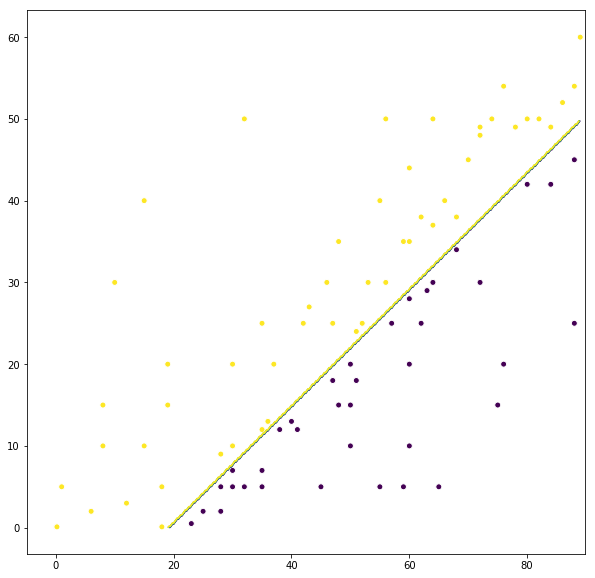

In [12]:
x = np.arange(0, 90, 0.2)
y = np.arange(0, 50, 0.2)
Xm, Ym = np.meshgrid(x, y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n,1))
Ymr = np.reshape(Ym,(m*n,1))

Xa = np.append(np.ones((len(Ymr),1)), Xmr, axis=1)
Xa = np.append(Xa,Ymr,axis=1)

Yg = reg_log(B,Xa)
Z = np.reshape(Yg, (m,n))
Z = np.round(Z)

plt.figure(figsize=(10,10))
plt.contour(Xm, Ym, Z)
plt.scatter(Xe[:, 0],Xe[:, 1], c=Ye, edgecolors='w')
plt.show()

In [410]:
Xm.shape, Ym.shape, Z.shape

((220, 400), (220, 400), (220, 400))

In [411]:
Xp = X[90:, :]
Yp = Y[90:]

In [412]:
Xpa = np.append(np.ones((len(Yp),1)), Xp, axis=1)
Yhat = np.round(reg_log(B,Xpa))

In [413]:
Yhat

array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.])

In [414]:
Yp

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [415]:
malos = sum(np.abs(Yhat-Yp))
malos

1.0

## Clasificador alta-baja plasticidad

In [420]:
data_file = 'CartaPlasticaB.csv'
data = pd.read_csv(data_file, header=None)

X = data.iloc[:,0:2].values
Y = data.iloc[:,2].values

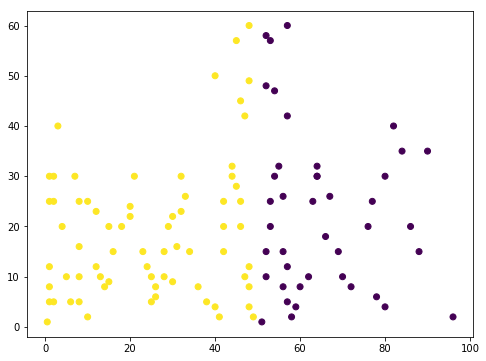

In [421]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:, 1], c=Y)
plt.show()

In [422]:
B = pyomo_utilities.logreg_clas(X, Y)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.13064217567443848
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


/Users/eremarin45/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


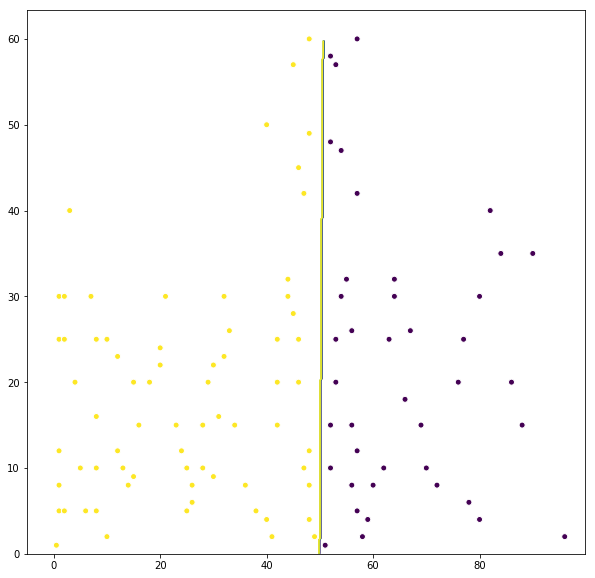

In [423]:
x = np.arange(0, 100, 0.2)
y = np.arange(0, 60, 0.2)
Xm, Ym = np.meshgrid(x, y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n,1))
Ymr = np.reshape(Ym,(m*n,1))

Xa = np.append(np.ones((len(Ymr),1)), Xmr, axis=1)
Xa = np.append(Xa,Ymr,axis=1)

Yg = reg_log(B,Xa)
Z = np.reshape(Yg, (m,n))
Z = np.round(Z)

plt.figure(figsize=(10,10))
plt.contour(Xm, Ym, Z)
plt.scatter(X[:, 0],X[:, 1], c=Y, edgecolors='w')
plt.show()

In [424]:
Xe = X[0:90, :]
Ye = Y[0:90]

In [425]:
B = pyomo_utilities.logreg_clas(Xe, Ye)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.07946610450744629
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


In [426]:
B

array([  8.08356270e+02,  -1.61916154e+01,   7.61425528e-01])

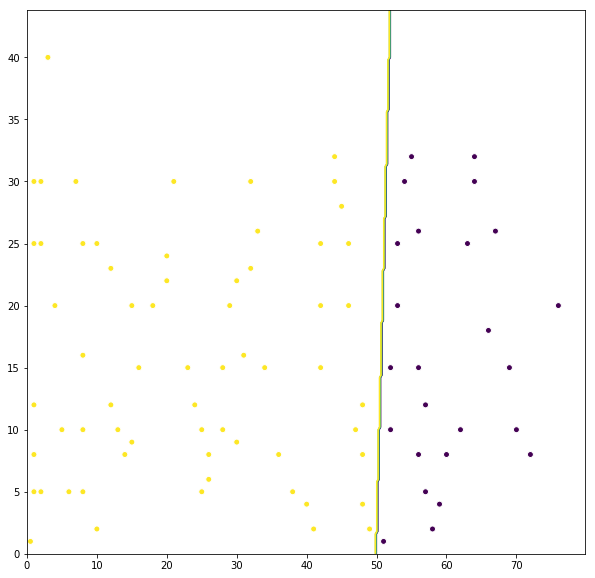

In [427]:
x = np.arange(0, 80, 0.2)
y = np.arange(0, 44, 0.2)
Xm, Ym = np.meshgrid(x, y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n,1))
Ymr = np.reshape(Ym,(m*n,1))

Xa = np.append(np.ones((len(Ymr),1)), Xmr, axis=1)
Xa = np.append(Xa,Ymr,axis=1)

Yg = reg_log(B,Xa)
Z = np.reshape(Yg, (m,n))
Z = np.round(Z)

plt.figure(figsize=(10,10))
plt.contour(Xm, Ym, Z)
plt.scatter(Xe[:, 0],Xe[:, 1], c=Ye, edgecolors='w')
plt.show()

In [428]:
Xm.shape, Ym.shape, Z.shape

((220, 400), (220, 400), (220, 400))

In [429]:
Xp = X[90:, :]
Yp = Y[90:]

In [430]:
Xpa = np.append(np.ones((len(Yp),1)), Xp, axis=1)
Yhat = np.round(reg_log(B,Xpa))

/Users/eremarin45/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [431]:
Yhat

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.])

In [432]:
Yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [433]:
malos = sum(np.abs(Yhat-Yp))
malos

2.0

***Referencias***

- Krieg, R.D. and Key, S.W., Implementation of a time dependent plasticity theory into structural computer programs. In: Stricklin, J.A., Saczalski, K.J. (Eds.), Constitutive Equations in Viscoplasticity: Computational and Engineering Aspects, AMD-20, ASEM, New York. pp. 125-137.

- Plasticidad (mecánica de sólidos). (2017, November 28). Retrieved from https://es.wikipedia.org/wiki/Plasticidad_(mec%C3%A1nica_de_s%C3%B3lidos)

- http://www6.uniovi.es/usr/fblanco/Practica6.PropiedadesArcillas.PLASTICIDAD.pdf
 